In [1]:
import pandas as pd
import numpy as np
from pylab import mpl, plt
import yfinance as yf
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

# Retrieve Bitcoin EOD data

In [13]:
btc_tick = yf.Ticker('BTC-USD')
df = btc_tick.history(start='2015-12-29')
clean_df = df[['Close']]
clean_df.head()

,Close
Date,
2015-12-29,432.98
2015-12-30,426.62
2015-12-31,430.57
2016-01-01,434.33
2016-01-02,433.44


# Read Google Search File

In [34]:
google_df = pd.read_csv('https://raw.githubusercontent.com/cbecks1212/Google_Search_BTC/main/multiTimeline%20(2).csv',sep=',',skiprows=1)
google_df = google_df.set_index('Week')
google_df.head()

,Bitcoin: (Worldwide)
Week,
2015-12-27,2
2016-01-03,3
2016-01-10,3
2016-01-17,3
2016-01-24,2


# # Combine two files into one to perform analysis

In [15]:
merged_df = pd.merge(google_df, clean_df, left_index=True, right_index=True)
merged_df.head()

,Bitcoin: (Worldwide),Close
2016-01-03,3,430.01
2016-01-10,3,447.99
2016-01-17,3,382.30
2016-01-24,2,402.97
2016-01-31,2,368.77


In [16]:
corr = merged_df.corr()
corr.style.background_gradient('coolwarm')

,Bitcoin: (Worldwide),Close
Bitcoin: (Worldwide),1.000000,0.587346
Close,0.587346,1.000000


In [19]:
np.corrcoef(merged_df['Bitcoin: (Worldwide)'], merged_df['Close'])

array([[1.        , 0.58734597],
       [0.58734597, 1.        ]])

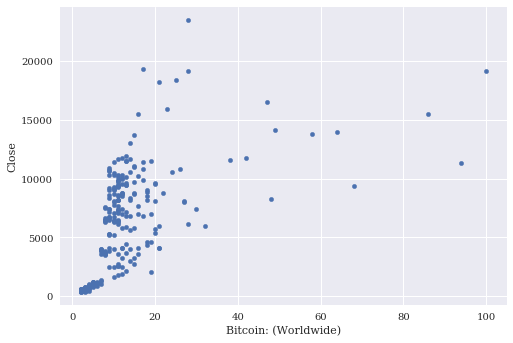

In [17]:
merged_df.plot.scatter(x='Bitcoin: (Worldwide)', y='Close')

# BTC YTD Performance

In [20]:
btc_tick_ytd = yf.Ticker('BTC-USD')
btc_ytd_df = btc_tick_ytd.history(start='2020-01-01')
100*((btc_ytd_df['Close'].iloc[-1]-btc_ytd_df['Close'].iloc[0])/btc_ytd_df['Close'].iloc[0])

269.0019818976496

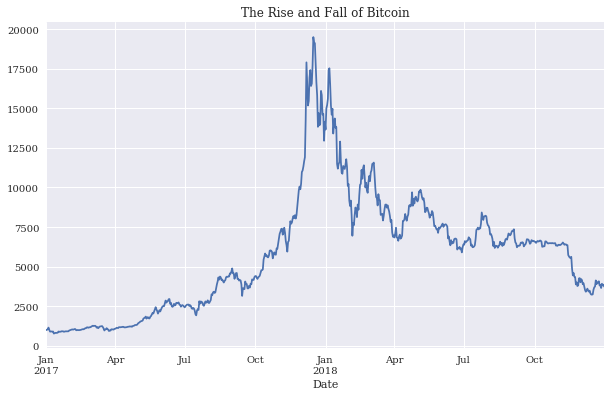

In [29]:
btc_tick = yf.Ticker('BTC-USD')
btc_crash = btc_tick.history(start='2017-01-01', end='2018-12-31')
btc_crash['Close'].plot(figsize=(10,6), title='The Rise and Fall of Bitcoin')

In [31]:
100*((btc_crash['Close'].iloc[-1]-btc_crash['Close'].max())/btc_crash['Close'].max())

-80.80410721429524

# Plotting BTC and Google Search Together

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd002b7f940>,
      dtype=object)

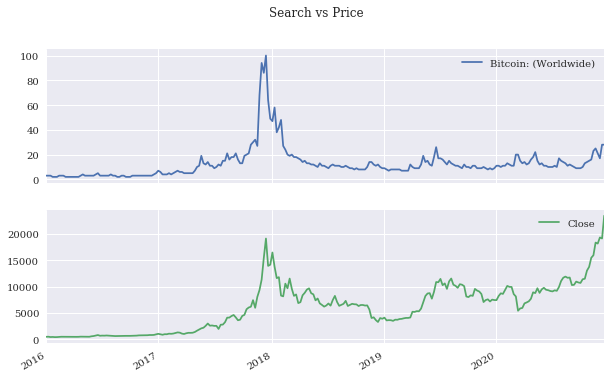

In [33]:
merged_df[['Bitcoin: (Worldwide)', 'Close']].plot(figsize=(10,6), subplots=True, title='Search vs Price')